## 在 NumPy 中实现 PCA

将数据转换成前 N 个主成分的伪代码：
1. 去除平均值；
2. 计算协方差矩阵；
3. 计算协方差矩阵的特征值和特征向量；
4. 将特征值从大到小排序；
5. 保留最上面的 N 个特征向量；
6. 将数据转换到上述 N 个特征向量构建的新空间中。

In [2]:
from numpy import *

In [3]:
def load_dataset(filename, delim='\t'):
    with open(filename) as file:
        string_arr = [line.strip().split(delim) for line in file.readlines()]
        data_arr = [list(map(float, line)) for line in string_arr]
        return mat(data_arr)

In [4]:
def pca(data_mat, top_n_feat=9999999):
    # 计算并减去原始数据集的平均值
    mean_vals = mean(data_mat, axis=0)
    mean_removed = data_mat - mean_vals
    # 计算协方差矩阵及其特征值
    cov_mat = cov(mean_removed, rowvar=0)
    eig_vals, eig_vects = linalg.eig(mat(cov_mat))
    # 对特征值进行升序排序
    eig_valsl_ind = argsort(eig_vals)
    # 根据特征值排序结果的逆序可得到 top_n_feat 个最大的特征向量
    eig_valsl_ind = eig_valsl_ind[:-(top_n_feat + 1):-1]
    # 获得的特征向量构成数据转换矩阵
    red_eig_vects = eig_vects[:, eig_valsl_ind]
    low_data_mat = mean_removed * red_eig_vects
    recon_mat = (low_data_mat * red_eig_vects.T) + mean_vals
    return low_data_mat, recon_mat

pca() 函数有两个参数：
- data_mat：用于进行 PCA 操作的数据集；
- top_n_feat：是一个可选参数，即应用的 N 个特征。如果不指定 top_n_feat 的值，那么函数就会返回前 9999999 个特征，或者原始数据中全部的特征。

In [10]:
data_mat = load_dataset('testSet.txt')

首先导入一个由 1000 个数据点组成的数据集，并在该数据集上进行 PCA 操作。

In [15]:
low_mat, recon_mat = pca(data_mat, 1)

low_mat 包含了降维之后的矩阵，这里是一个一维矩阵。

In [16]:
shape(low_mat)

(1000, 1)

可以通过如下命令将降维后的数据和原始数据一起绘制出来

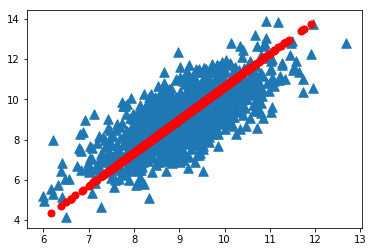

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data_mat[:, 0].flatten().A[0], data_mat[:, 1].flatten().A[0], marker='^', s=90)
ax.scatter(recon_mat[:, 0].flatten().A[0], recon_mat[:, 1].flatten().A[0], marker='o', s=50, c='red')
plt.show()

上图三角形点表示原始数据集，圆形点表示第一主成分。